In [1]:

import numpy as np
import pandas as pd
import embeddings
import gensim

## Simple Example with Visualisations

In [2]:
col2 = ['Barks', 'Roars', 'Talks', 'Sings', 'Dances']
col3 = ['Dog', 'Cat', 'Bird', 'Penguin','Mouse']
col4 = ['Playful', 'Lazy', 'Aggressive', 'Calm']

col2_col3_dep = {'Barks':[0.8,0.05,0.05,0.05,0.05], 'Roars':[0.2,0.2,0.2,0.2,0.2], 'Talks':[0.2,0.2,0.2,0.2,0.2],'Sings':[0.2,0.2,0.2,0.2,0.2],'Dances':[0.2,0.2,0.2,0.2,0.2]}
col3_col4_dep = {'Dog':[0.85,0.05,0.05,0.05], 'Cat':[0.05,0.85,0.05,0.05], 'Bird':[0.25,0.25,0.25,0.25],'Penguin':[0.25,0.25,0.25,0.25],'Mouse':[0.25,0.25,0.25,0.25]}

def create_categorical_dataset(cols, deps, samples):
  data = [None] * samples
  for i in range(samples):
    col1_val = np.random.choice(cols[0],1)[0]
    prev_col_val = col1_val
    col_vals = [col1_val]
    for c,d in zip(cols[1:],deps):
      new_col_val = np.random.choice(c,1,p=d[prev_col_val])[0]
      prev_col_val = new_col_val
      col_vals.append(new_col_val)
    data[i] = col_vals
  df = pd.DataFrame(data)
  return df


df = create_categorical_dataset([col2,col3,col4],[col2_col3_dep,col3_col4_dep], samples = 10000)
for c in df.columns:
    df[c] = df[c].apply(lambda x: str(c) + "_" + str(x))

In [26]:
# many values work here, different algorithms prefer different embeddings sizes. 
# e.g. LSA tends to work better with low embedding sizes
embedding_size = 50 

embed_model = 'glove'

if embed_model == 'w2v':
    model = gensim.models.Word2Vec(df.values.tolist(), min_count=1, size=embedding_size, sg=1, window=len(df.columns),
                                   negative=10)
elif embed_model == 'lsa':
    lsa_embeddings,unique_vectors = embeddings.lsa(df,n_components = embedding_size)
    unique_words = []
    for c in df.columns:
        unique_words.extend(df[c].unique())
else:
    model = embeddings.glove_vectors(df, embedding_size=embedding_size,alpha=1.5,lr=0.05,epochs=50, max_count=100)


Performing 50 training epochs with 1 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


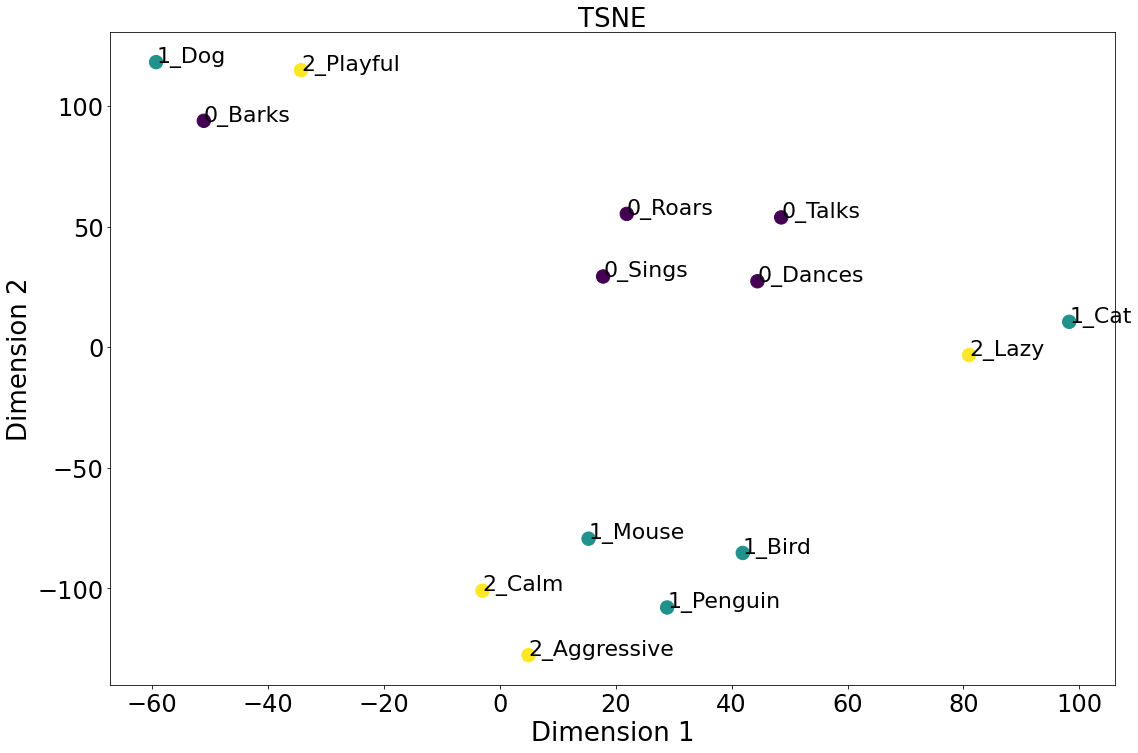

In [28]:
if embed_model == 'lsa':
    embeddings.plot_tsne(model=None, df=df,words=unique_words, vectors=unique_vectors.tolist(), colour=True, perplexity=4)
else:
    embeddings.plot_tsne(model, df, colour=True, perplexity=5)

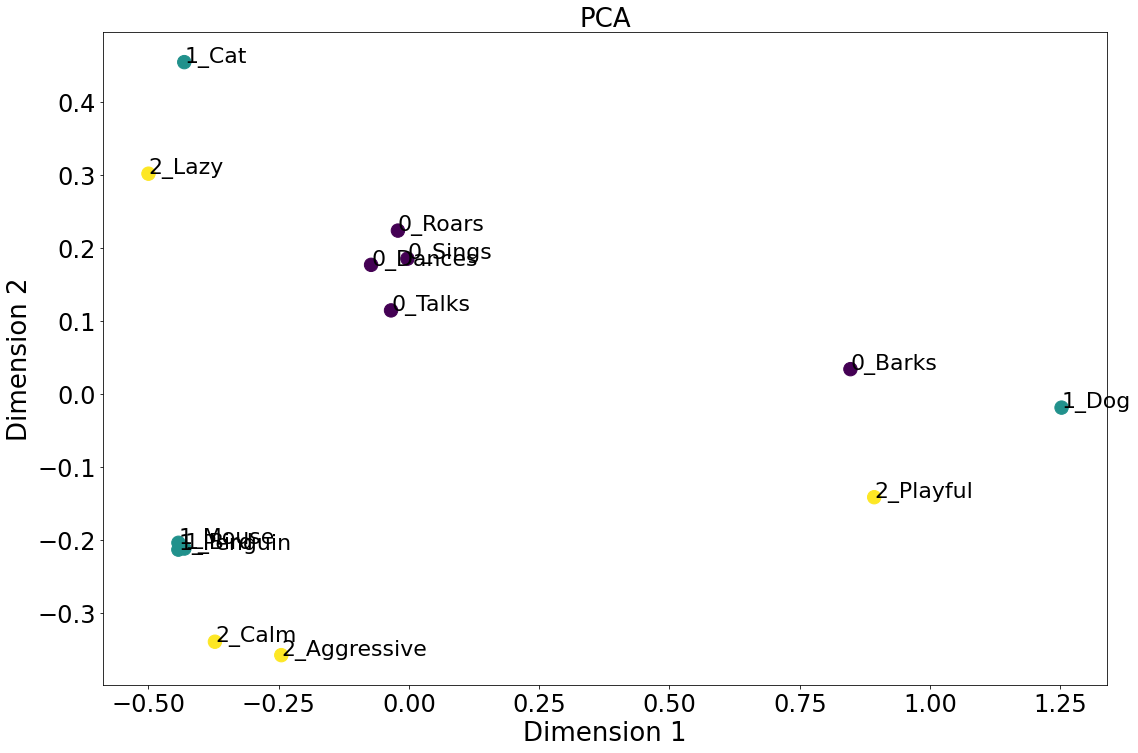

In [27]:
if embed_model == 'lsa':
    embeddings.plot_pca(model=None, df=df,words=unique_words, vectors=unique_vectors.tolist(), colour=True)
else:
    embeddings.plot_pca(model, df, colour=True)